In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pickle
from scipy.signal import find_peaks

Food for thought:
1. Is there any connection between oscillation period and the step size?
2. What about the system with damped oscillations?

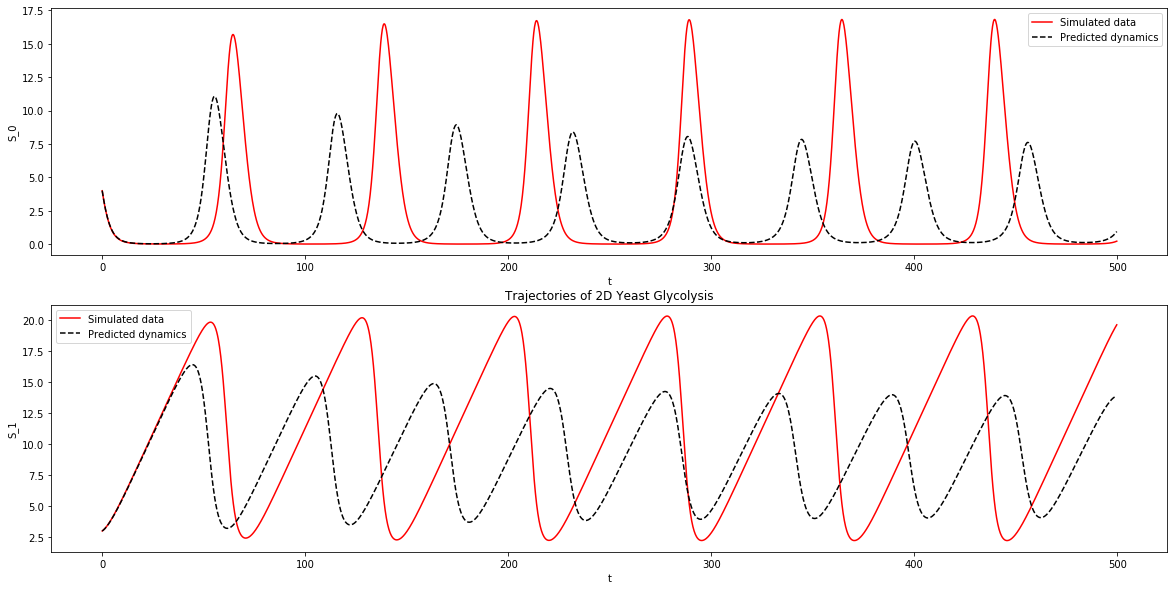

In [3]:
# step size h = 0.2

with open('bier.pkl', 'rb') as file:
    bier = pickle.load(file)

time_points = bier['t']
bier_pred = bier['pred']
bier_data = bier['data'].reshape(-1,2)

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, bier_data[:, species], 'r-', label='Simulated data')
    plt.plot(time_points, bier_pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.title('Trajectories of 2D Yeast Glycolysis')
plt.show()

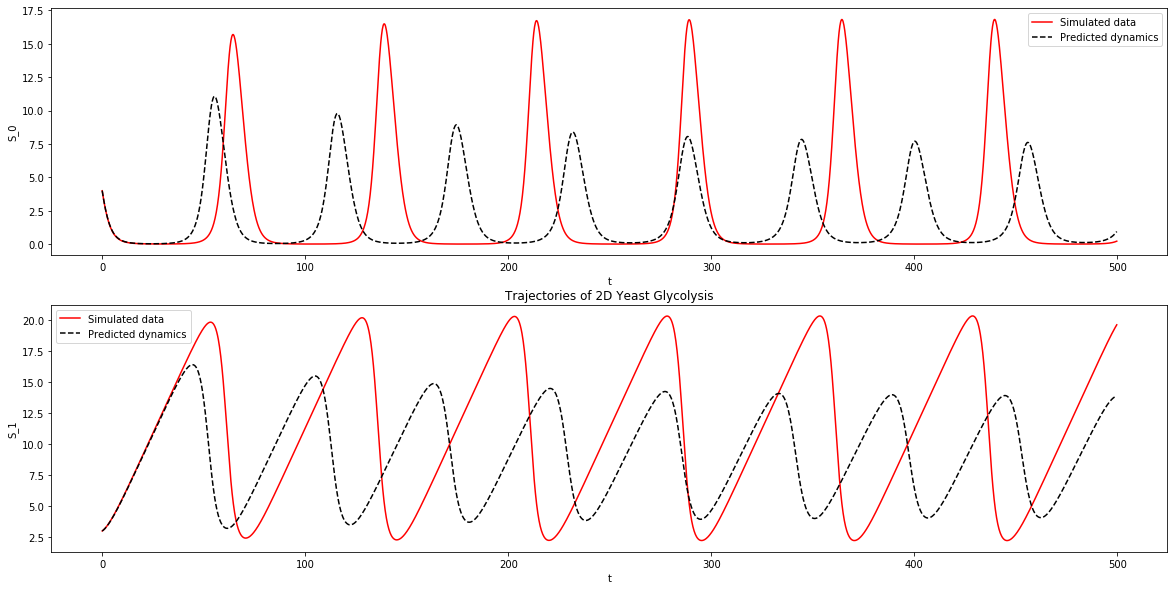

In [7]:
# step size h = 0.2

with open('data/bier_oscillator.pkl', 'rb') as file:
    bier = pickle.load(file)

time_points = bier['t']
bier_pred = bier['pred']
bier_data = bier['data'].reshape(-1,2)

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, bier_data[:, species], 'r-', label='Simulated data')
    plt.plot(time_points, bier_pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.title('Trajectories of 2D Yeast Glycolysis')
plt.show()

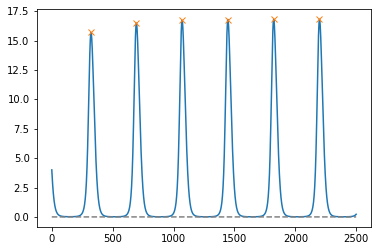

In [8]:
# check the period
x = bier_data[:,0]
peaks, _ = find_peaks(x, height=0)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

In [9]:
for i in range(len(peaks)-1):
    print(peaks[i + 1] - peaks[i])

373
375
376
376
376


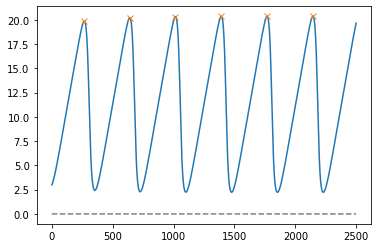

In [10]:
# check the period
x = bier_data[:,1]
peaks, _ = find_peaks(x, height=0)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

In [11]:
for i in range(len(peaks)-1):
    print(peaks[i + 1] - peaks[i])

373
375
377
376
376


Text(0.5, 1.0, 'Phase plane of 2D Yeast Glycolysis')

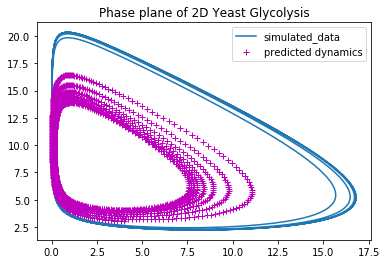

In [4]:
# Phase plane

plt.plot(bier_data[:,0], bier_data[:,1], label='simulated_data')
plt.legend()
plt.plot(bier_pred[:,0], bier_pred[:,1], 'm+', label='predicted dynamics')
plt.legend()
plt.title('Phase plane of 2D Yeast Glycolysis')

Remark: the period here is much longer than the period for the 7-D glycolysis.

# Damped Oscillations

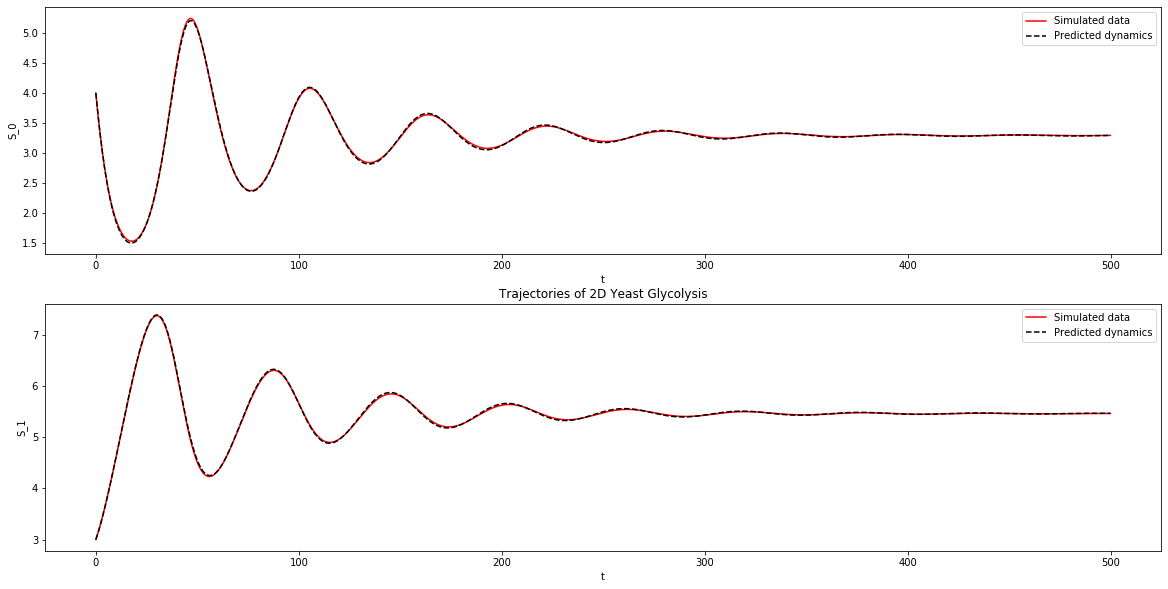

In [3]:
# step size h = 0.2

with open('bier_damped.pkl', 'rb') as file:
    bier = pickle.load(file)

time_points = bier['t']
bier_pred = bier['pred']
bier_data = bier['data'].reshape(-1,2)

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, bier_data[:, species], 'r-', label='Simulated data')
    plt.plot(time_points, bier_pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.title('Trajectories of 2D Yeast Glycolysis')
plt.show()

In [9]:
# create training data consisting of noisy measurements

sampling_rate = 5 # take measurement every 0.05 mins
noise = 0.01
gly_data = sol[0::sampling_rate, :]
gly_data += noise * gly_data.std(0) * np.random.randn(*gly_data.shape)

print("Training data size: ", gly_data.shape)

Training data size:  (100, 7)


In [11]:
# save the data to disk

with open('gly_data.npy', 'wb') as file:
    np.save(file, gly_data)

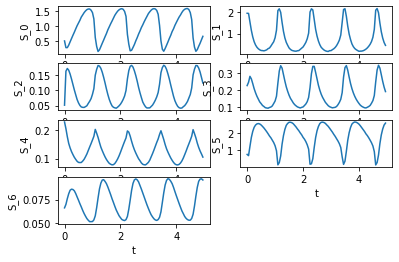

In [34]:
time_measurements = np.arange(0, 5, 0.01 * sampling_rate)

for species in range(7):
    plt.subplot(4,2,species + 1)
    plt.plot(time_measurements, gly_data[:,species])
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))

In [38]:
# sanity checks
print("Original vs Predicted")
print(gly_data[0,:])
print(x_init) # should be the same up to noise

print("Measurement interval")
print(time_measurements[1] - time_measurements[0]) # should give 0.05

Original vs Predicted
[0.50677647 1.93534573 0.05103011 0.2279497  0.22743185 0.7569
 0.06608424]
[0.50712444 1.92737262 0.05041518 0.22811383 0.22676696 0.74994409
 0.06602177]
Measurement interval
0.05


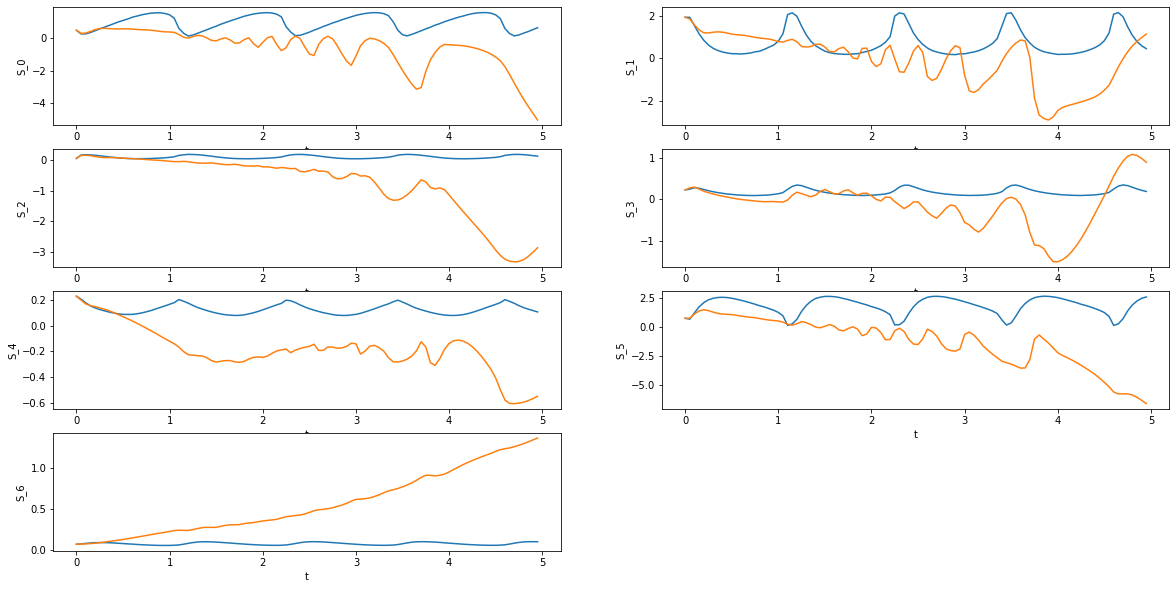

In [41]:
with open('gly_pred.npy', 'rb') as file:
    gly_pred = np.load(file)
    
plt.figure(figsize=(20, 10))
for species in range(7):
    plt.subplot(4,2,species + 1)
    plt.plot(time_measurements, gly_data[:,species])
    plt.plot(time_measurements, gly_pred[:,species])
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))